In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor



In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
# Now we need to read in the data
df = pd.read_csv(r'Data\movies.csv')

In [3]:
#Check out the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [7]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [8]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype('Int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [9]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [10]:
pd.set_option('display.max_rows', 10)

In [11]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Loving Annabelle,Not Rated,Drama,2006,"May 24, 2007 (Germany)",6.3,12000.0,Katherine Brooks,Katherine Brooks,Erin Kelly,United States,1000000,0,Big Easy Pictures,77.0,2007
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0,2020
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0,1997
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,2019


In [12]:
# Drop any duplicates -- Shouldn't be any in this dataset

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Loving Annabelle,Not Rated,Drama,2006,"May 24, 2007 (Germany)",6.3,12000.0,Katherine Brooks,Katherine Brooks,Erin Kelly,United States,1000000,0,Big Easy Pictures,77.0,2007
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0,2020
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0,1997
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,2019


In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


In [14]:
#Checking correlation between budget, company, and gross revenue
#Drop all columns with null values for budget or gross revenue

dropped = df.dropna(subset=['budget', 'gross'])
dropped = df[df.gross >1]
df = dropped


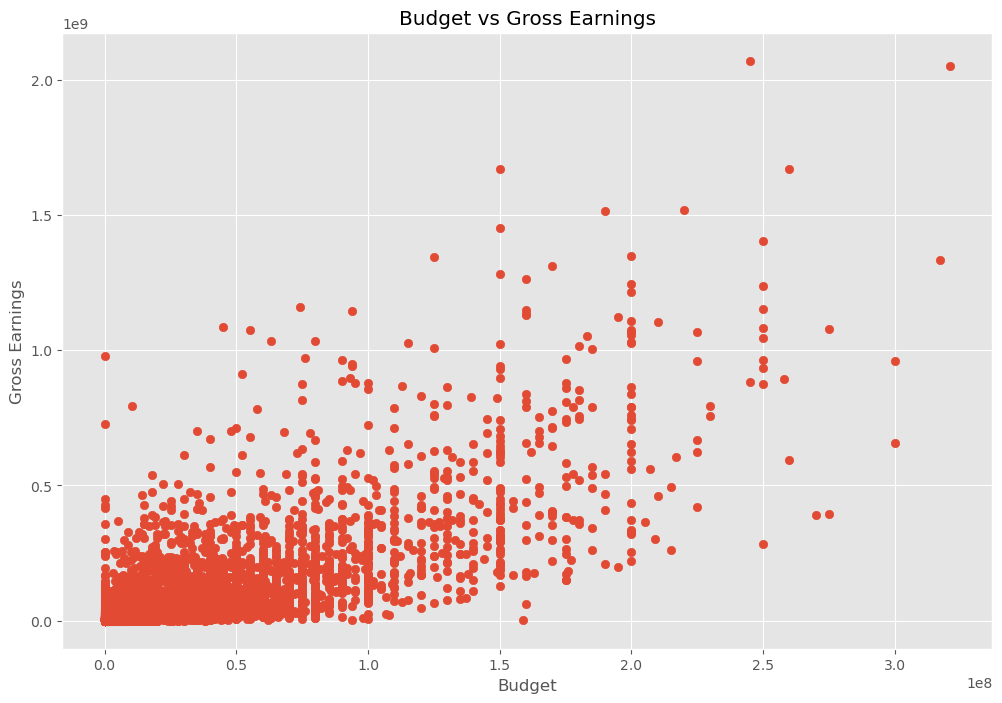

In [15]:
#Scatter plot with budget and gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

plt.show()

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


<AxesSubplot:xlabel='budget', ylabel='gross'>

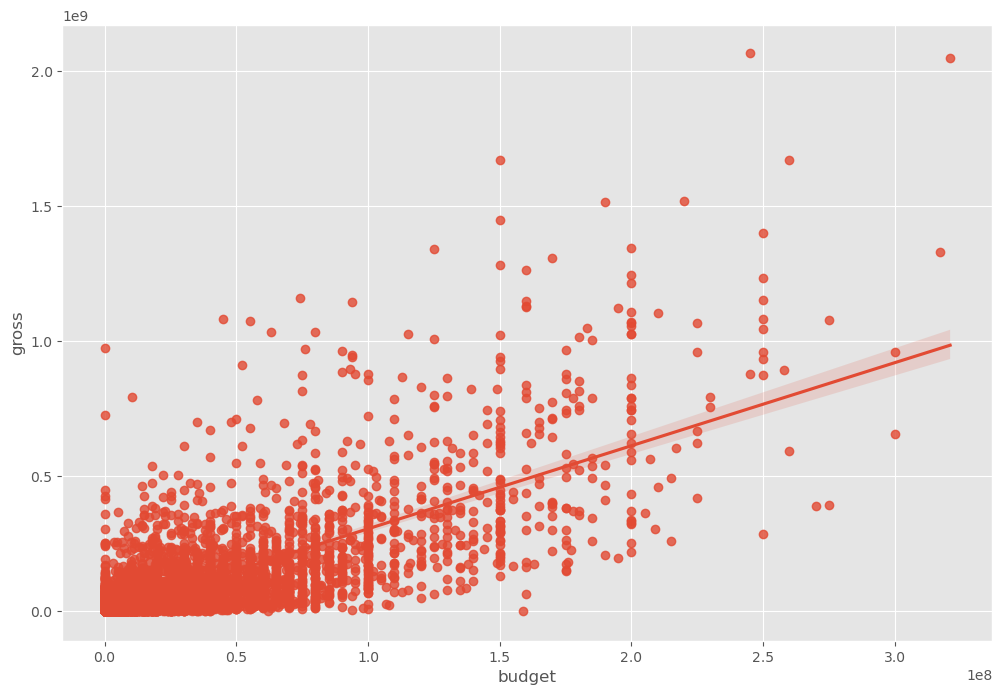

In [17]:
#Regression Plot of budget vs gross

sns.regplot(x='budget', y='gross', data=df)

In [18]:
#Export preprocessed data in order to ask ChatGPT which ML technique it suggests
#df.to_csv('regression_movies.csv')

In [19]:
"""
Several ML algorithms were suggested by ChatGPT they are as follows
Linear Regression
Random Forest Regression
Gradient Boosting Regression
Support Vector Regression
Artificial Neural Networks
"""

'\nSeveral ML algorithms were suggested by ChatGPT they are as follows\nLinear Regression\nRandom Forest Regression\nGradient Boosting Regression\nSupport Vector Regression\nArtificial Neural Networks\n'

In [20]:
#We'll start with the linear regression as it is the simplest to understand and implement
#Then I'll try another one or two  after that
#Next I'll reframe the question into a classification problem and try other techniques

In [21]:
#Since I am making changes to the dataframe below I am going to create a new variable to store the altered dataframe.
linreg = df.drop(['released'], axis = 1)
linreg = linreg.dropna()
#Got an error making predictions that said there was NaN, infinity, or value too large.
linreg.isnull().values.any()
linreg.isnull().sum()

name           0
rating         0
genre          0
year           0
score          0
              ..
budget         0
gross          0
company        0
runtime        0
yearcorrect    0
Length: 15, dtype: int64

In [22]:
# Preprocessing:
# convert categorical variables to numerical using label encoding

le = LabelEncoder()
linreg['genre'] = le.fit_transform(linreg['genre'])
linreg['director'] = le.fit_transform(linreg['director'])
linreg['writer'] = le.fit_transform(linreg['writer'])
linreg['company'] = le.fit_transform(linreg['company'])
linreg['country'] = le.fit_transform(linreg['country'])
linreg['star'] = le.fit_transform(linreg['star'])
linreg['rating'] = le.fit_transform(linreg['rating'])
linreg.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,7.8,876000.0,1077,2448,494,53,245000000,2069521700,1446,138.0,2015
7244,Avengers: Infinity War,5,0,2018,8.4,897000.0,160,708,2107,53,321000000,2048359754,1508,149.0,2018
7480,The Lion King,4,2,2019,6.9,222000.0,1400,1840,633,53,260000000,1670727580,2176,118.0,2019
6653,Jurassic World,5,0,2015,7.0,593000.0,497,3429,412,53,150000000,1670516444,2142,124.0,2015
6043,The Avengers,5,0,2012,8.0,1300000.0,1461,2224,2107,53,220000000,1518815515,1508,143.0,2012


In [23]:
# split the data into training and testing sets
X = linreg.drop(['name', 'gross'], axis=1)
y = linreg['gross']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
# fit a linear regression model
reg = LinearRegression().fit(X_train, y_train)

In [25]:
# make predictions on the test set
y_pred = reg.predict(X_test)

In [26]:
# evaluate the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)

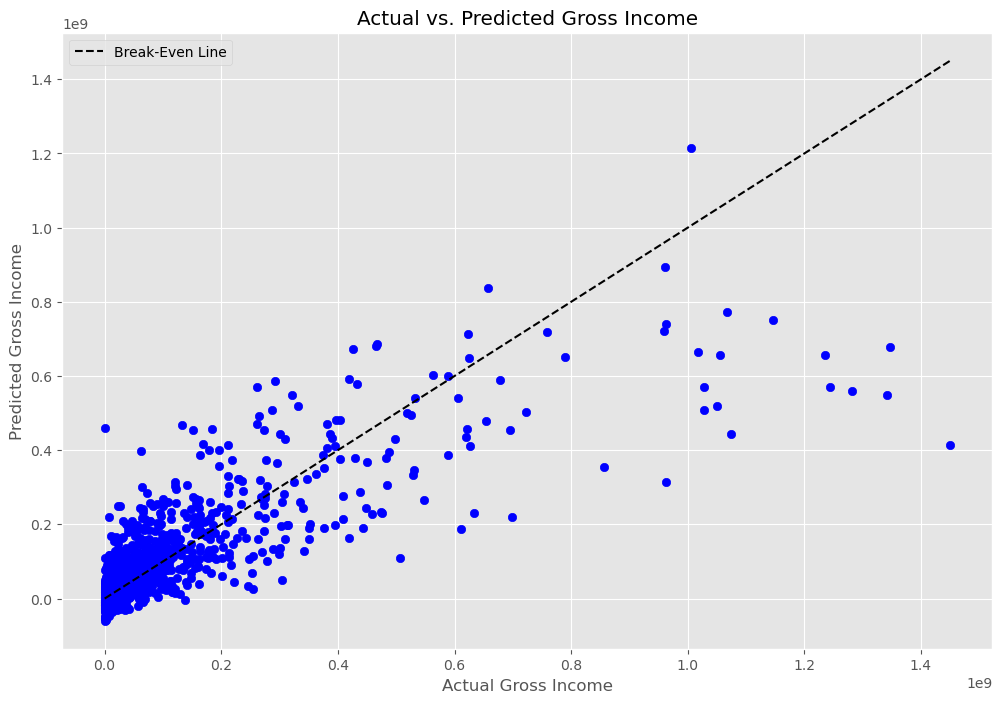

In [27]:
# plot the actual vs. predicted values
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('Actual Gross Income')
plt.ylabel('Predicted Gross Income')
plt.title('Actual vs. Predicted Gross Income')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Break-Even Line")
plt.legend()
plt.show()

In [28]:
#Let's try tuning some hyperparameters to try and improve the models accuracy
#specify the hyperparameters to tune and their possible values
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}
# create a linear regression model
reg = LinearRegression()

In [29]:
# create a grid search object with the specified hyperparameters
grid_search = GridSearchCV(reg, param_grid, cv=5)
# fit the grid search to the data
grid_search.fit(X_train, y_train)


C:\Users\TrustyBeard\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\TrustyBeard\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipel

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [30]:
# print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'fit_intercept': True, 'normalize': False}


In [31]:
# get the best model
best_model = grid_search.best_estimator_
print(best_model)

LinearRegression(normalize=False)


In [32]:
best_reg = LinearRegression(fit_intercept=True, normalize=False)
best_reg.fit(X_train, y_train)
y_pred = best_reg.predict(X_test)

C:\Users\TrustyBeard\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


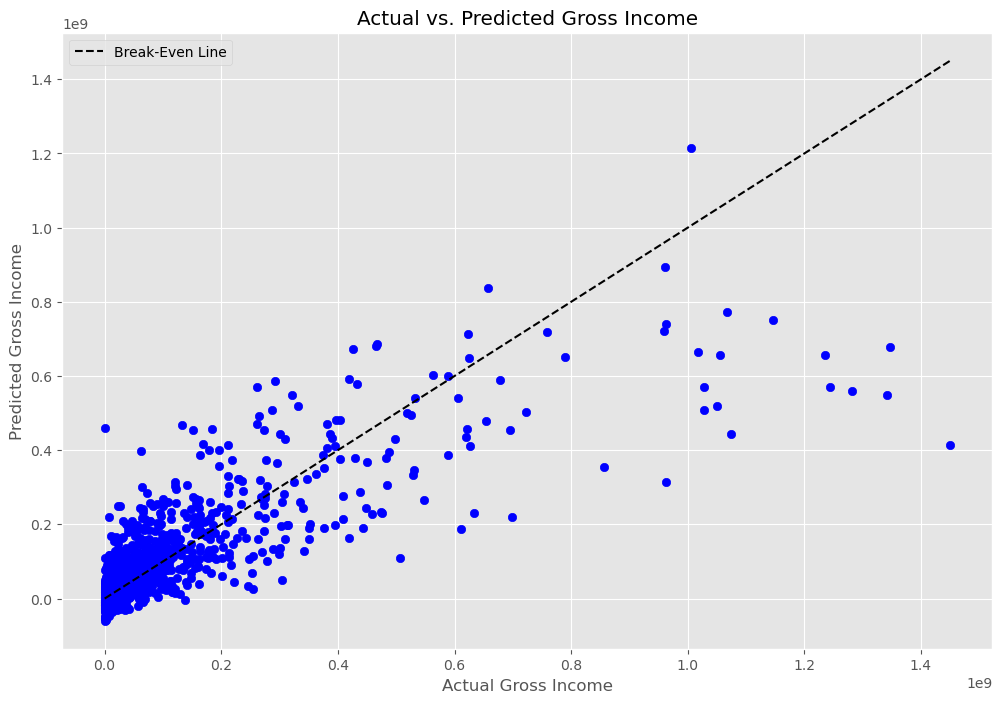

In [33]:
# plot the actual vs. predicted values
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('Actual Gross Income')
plt.ylabel('Predicted Gross Income')
plt.title('Actual vs. Predicted Gross Income')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Break-Even Line")
plt.legend()
plt.show()

In [34]:
#Adding some cross validation doesn't seem to help to change the predictive outcome of the linear regression
#I'm going to move on to another model. I am thinking a Gradient Boosting Regressor
gbrdf = df
gbrdf.drop(columns=['name', 'released'], axis=1, inplace=True)
gbrdf.dropna(inplace=True)
gbrdf.head()

,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,PG,Animation,2019,6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,PG-13,Action,2015,7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,PG-13,Action,2012,8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


In [42]:
gbrdf.isnull().sum()
gbrdf

,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5,0,2015,7.8,876000.0,1077,2448,494,53,245000000,2069521700,1446,138.0,2015
7244,5,0,2018,8.4,897000.0,160,708,2107,53,321000000,2048359754,1508,149.0,2018
7480,4,2,2019,6.9,222000.0,1400,1840,633,53,260000000,1670727580,2176,118.0,2019
6653,5,0,2015,7.0,593000.0,497,3429,412,53,150000000,1670516444,2142,124.0,2015
6043,5,0,2012,8.0,1300000.0,1461,2224,2107,53,220000000,1518815515,1508,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,6,5,1998,6.1,2900.0,1866,1222,2032,52,0,1672,1755,87.0,1998
2906,3,5,1996,7.4,37000.0,1959,1878,1419,11,0,1605,319,110.0,1996
3818,6,4,2000,6.5,5200.0,705,1072,2183,52,0,1400,451,103.0,2001
7580,3,5,2019,5.2,735.0,1391,2117,2143,53,0,682,1869,93.0,2020


In [36]:
le = LabelEncoder()
gbrdf['genre'] = le.fit_transform(gbrdf['genre'])
gbrdf['director'] = le.fit_transform(gbrdf['director'])
gbrdf['writer'] = le.fit_transform(gbrdf['writer'])
gbrdf['company'] = le.fit_transform(gbrdf['company'])
gbrdf['country'] = le.fit_transform(gbrdf['country'])
gbrdf['star'] = le.fit_transform(gbrdf['star'])
gbrdf['rating'] = le.fit_transform(gbrdf['rating'])
gbrdf.head()

,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5,0,2015,7.8,876000.0,1077,2448,494,53,245000000,2069521700,1446,138.0,2015
7244,5,0,2018,8.4,897000.0,160,708,2107,53,321000000,2048359754,1508,149.0,2018
7480,4,2,2019,6.9,222000.0,1400,1840,633,53,260000000,1670727580,2176,118.0,2019
6653,5,0,2015,7.0,593000.0,497,3429,412,53,150000000,1670516444,2142,124.0,2015
6043,5,0,2012,8.0,1300000.0,1461,2224,2107,53,220000000,1518815515,1508,143.0,2012


In [37]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(gbrdf.drop(['gross'], axis=1), gbrdf['gross'], test_size=0.2, random_state=0)

In [38]:
# Initialize the model
gbr = GradientBoostingRegressor()

In [39]:
# Fit the model on the training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [40]:
# Make predictions on the test data
y_pred = gbr.predict(X_test)

In [41]:
# Evaluate the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 36955766.85907575


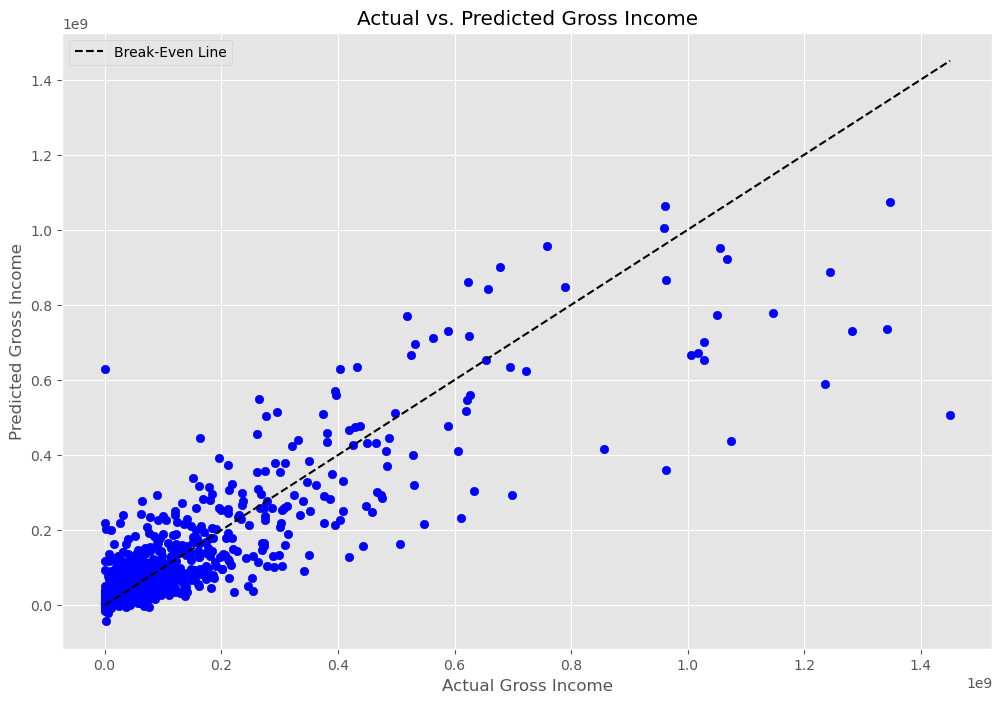

In [43]:
#Let's plot the output even though the mae is still really high
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('Actual Gross Income')
plt.ylabel('Predicted Gross Income')
plt.title('Actual vs. Predicted Gross Income')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Break-Even Line")
plt.legend()
plt.show()

In [45]:
#gbrdf.to_csv('Data\gbrdf.csv')
#It appears that linear regression techniques 